# Dependencies

In [74]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.ensemble import AdaBoostRegressor

%matplotlib inline
import warnings

In [75]:
# Read the data
train_df = pd.read_csv('Resources/train.csv')
test_df = pd.read_csv('Resources/test.csv')

In [76]:
# Create Total Living Area SF and Price Per SF for lot and Living Area 
basement1 = train_df['BsmtFinSF1']
basement2 = train_df['BsmtFinSF2']
living_space = train_df['GrLivArea']
sale_price = train_df['SalePrice']

total_square_feet = living_space + basement1 + basement2
cost_per_square_feet = sale_price / total_square_feet

# Train Set Up 
train_df['Total Square Feet (ft)'] = total_square_feet
train_df['Total Cost Per Square Feet ($)'] = cost_per_square_feet.round(2)


# Test Set Up
Test_basement1 = test_df['BsmtFinSF1']
Test_basement2 = test_df['BsmtFinSF2']
Test_living_space = test_df['GrLivArea']


Test_total_square_feet = Test_living_space + Test_basement1 + Test_basement2
test_df['Total Square Feet (ft)'] = total_square_feet

In [77]:
#Train Encoding, created multiple additional columns
train_df_hot = pd.DataFrame(train_df, columns=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']      
        )

train_df_hot = pd.get_dummies(train_df_hot,drop_first=True)

#Test DF Hot Encoding 
test_df_hot = pd.DataFrame(test_df, columns=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']      
        )

test_df_hot = pd.get_dummies(test_df_hot,drop_first=True)


# Combine the Dataframes and Drop the String Values 
train_df = pd.concat([train_df, train_df_hot], axis=1)
train_df = train_df.drop(columns=['Id','Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] )


test_df = pd.concat([test_df, test_df_hot], axis=1)
test_df = test_df.drop(columns=['Id','Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] )

#Set Everything to Numeric
train_df = train_df.apply(pd.to_numeric)
test_df = test_df.apply(pd.to_numeric)

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)


In [78]:
train_df = train_df.drop(columns=['SalePrice'])

# Exploration 


In [79]:
# sns.set_style('whitegrid')
# plt.subplots(figsize = (30,20))
# ## Plotting heatmap. 

# # Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(train_df.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(train_df.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
# plt.xticks(size = 14)
# ## Give title. 
# plt.title("Features Heatmap", fontsize = 30);

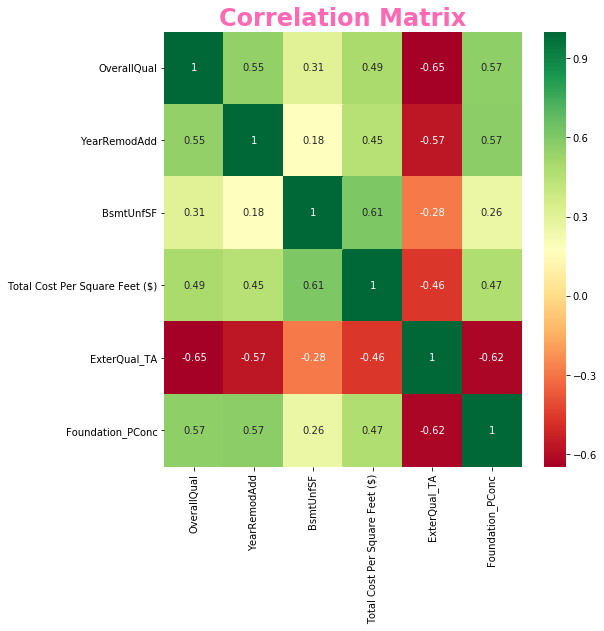

In [80]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat['Total Cost Per Square Feet ($)'])>0.45]
plt.figure(figsize=(8,8))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_title('Correlation Matrix', size = 24, fontweight = 'bold', color = 'hotpink')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('./templates/Images/Heatmap.png')

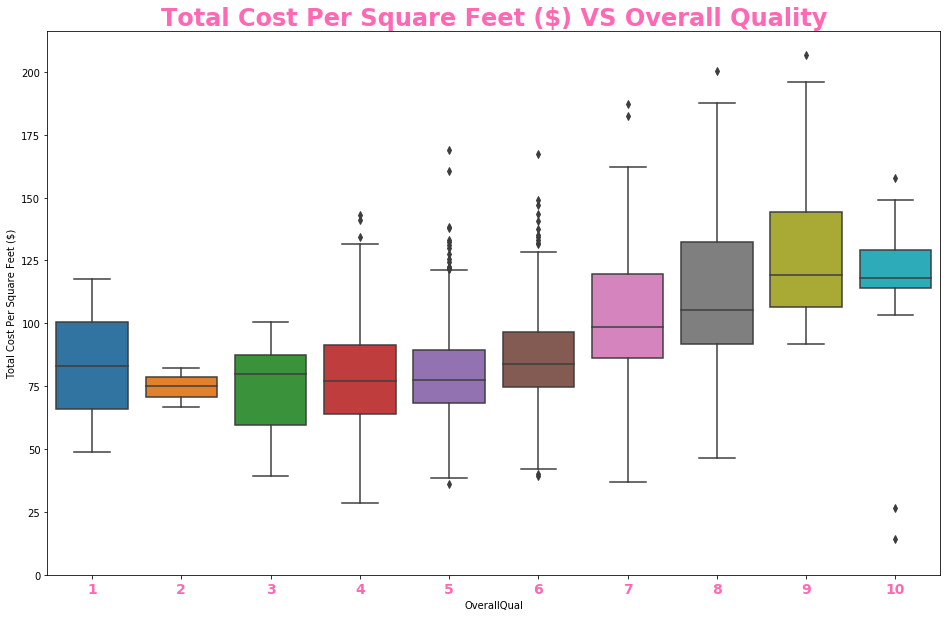

In [81]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['Total Cost Per Square Feet ($)'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y='Total Cost Per Square Feet ($)', data=data)
plt.xticks(size = 14, fontweight = 'bold', color = 'hotpink')
ax.set_title('Total Cost Per Square Feet ($) VS Overall Quality', size = 24, fontweight = 'bold', color = 'hotpink')
fig.axis(ymin=0,);
ax.figure.savefig('./templates/Images/OverallQuality.png')

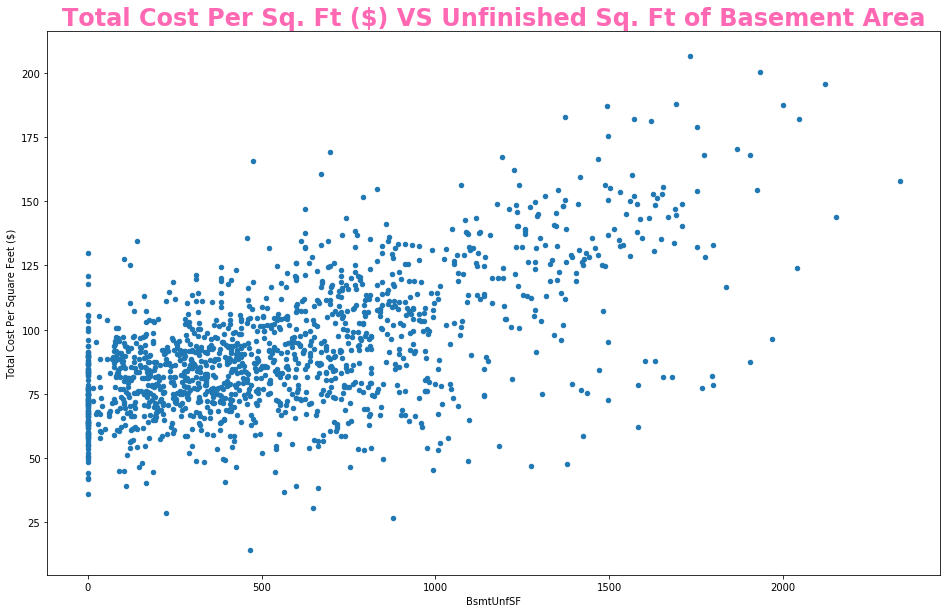

In [82]:
var = 'BsmtUnfSF'
data = pd.concat([train_df['Total Cost Per Square Feet ($)'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Total Cost Per Square Feet ($)',figsize=(16, 10));
plt.title('Total Cost Per Sq. Ft ($) VS Unfinished Sq. Ft of Basement Area', size = 24, fontweight = 'bold', color = 'hotpink')
plt.savefig('./templates/Images/BsmtUnfSF.png')

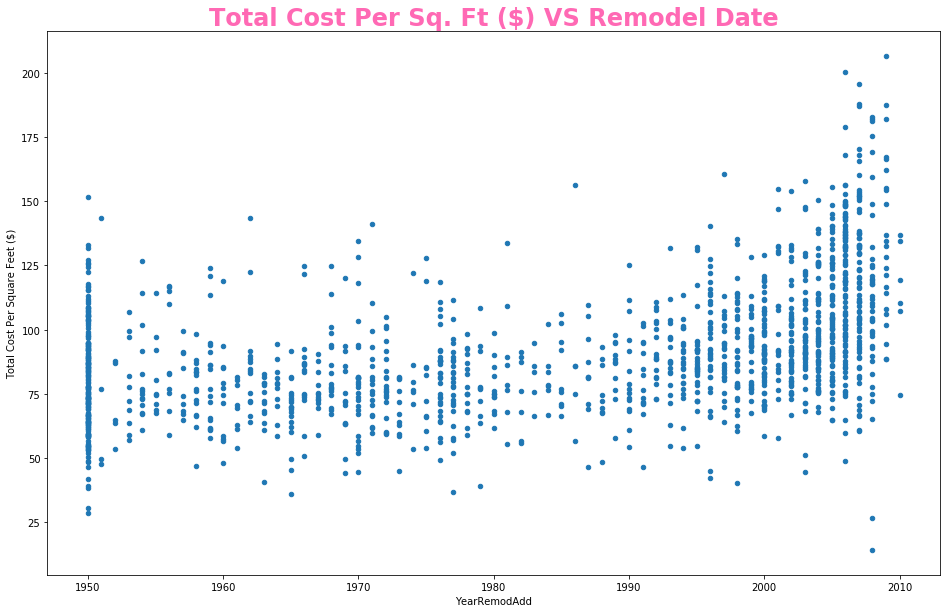

In [83]:
var = 'YearRemodAdd'
data = pd.concat([train_df['Total Cost Per Square Feet ($)'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='Total Cost Per Square Feet ($)',figsize=(16, 10));
plt.title('Total Cost Per Sq. Ft ($) VS Remodel Date', size = 24, fontweight = 'bold', color = 'hotpink')
plt.savefig('./templates/Images/YearRemodAdd.png')

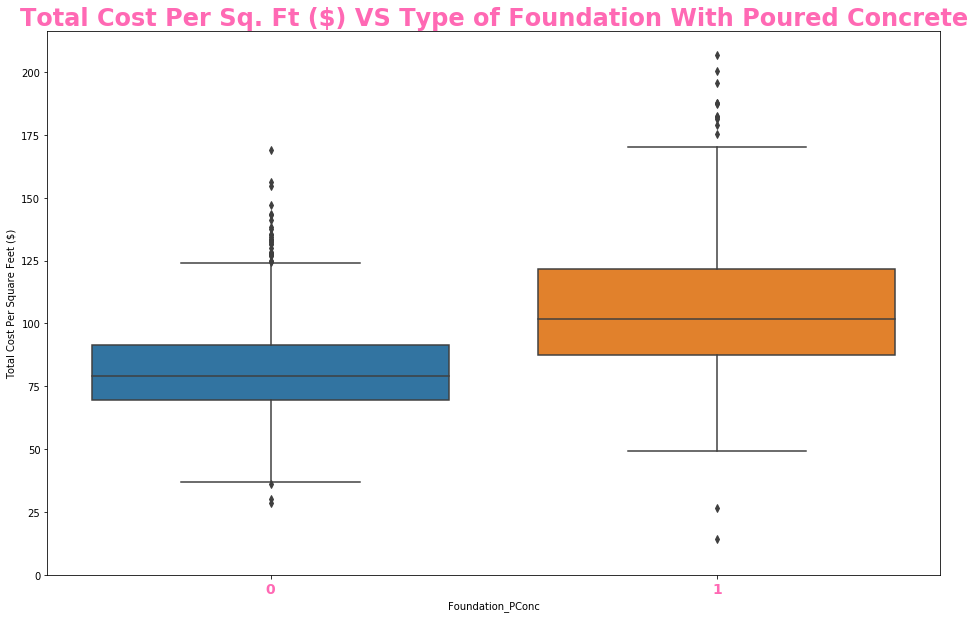

In [93]:
#box plot overallqual/saleprice
var = 'Foundation_PConc'
data = pd.concat([train_df['Total Cost Per Square Feet ($)'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y='Total Cost Per Square Feet ($)', data=data)
plt.xticks(size = 14, fontweight = 'bold', color = 'hotpink')
ax.set_title('Total Cost Per Sq. Ft ($) VS Type of Foundation With Poured Concrete', size = 24, fontweight = 'bold', color = 'hotpink')
fig.axis(ymin=0,);
ax.figure.savefig('./templates/Images/Foundation_PConc.png')

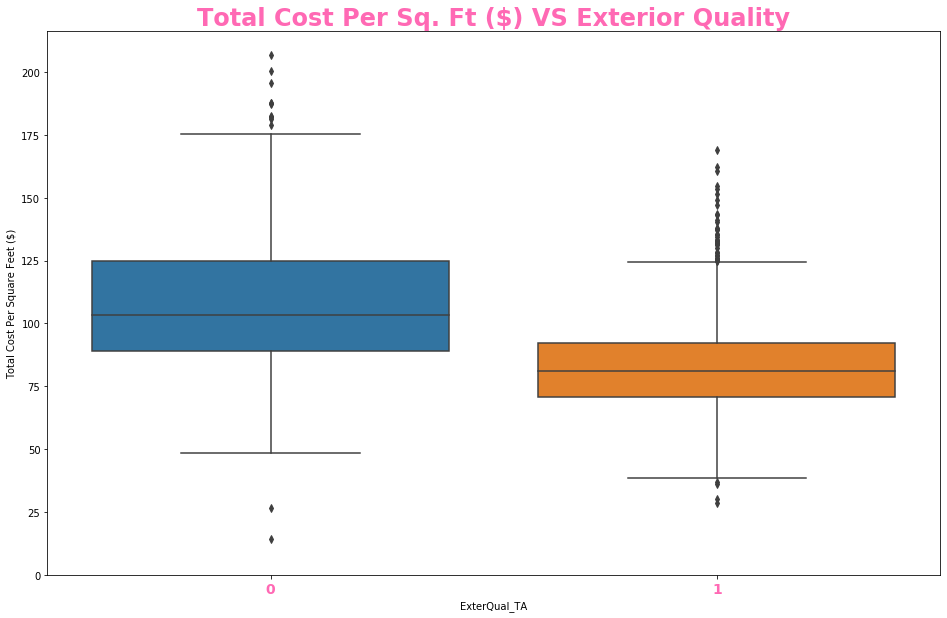

In [94]:
#box plot overallqual/saleprice
var = 'ExterQual_TA'
data = pd.concat([train_df['Total Cost Per Square Feet ($)'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y='Total Cost Per Square Feet ($)', data=data)
plt.xticks(size = 14, fontweight = 'bold', color = 'hotpink')
ax.set_title('Total Cost Per Sq. Ft ($) VS Exterior Quality', size = 24, fontweight = 'bold', color = 'hotpink')
fig.axis(ymin=0,);
ax.figure.savefig('./templates/Images/ExterQual_TA.png')

In [86]:
# Obtain target and predictors
strong_cor = ["OverallQual", "YearRemodAdd","BsmtUnfSF","ExterQual_TA","Foundation_PConc"]

X = train_df[strong_cor]
y = train_df["Total Cost Per Square Feet ($)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1460, 5) (1460, 1)


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [88]:
from sklearn.linear_model import LinearRegression
# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
#calculate R2 Score and Mean Squared Error (MSE)
from sklearn.metrics import  r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
r2 = r2_score(y, predicted)

print(f"R-squared: {r2}")

R-squared: 0.531143673282861


In [90]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [91]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5427163893247158
Testing Score: 0.4892975177009994


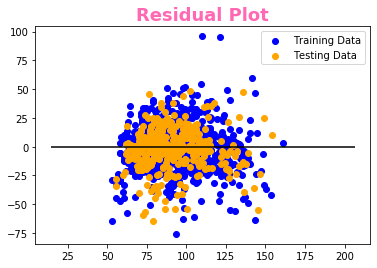

In [97]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot", size = 18, fontweight = 'bold', color = 'hotpink')
plt.savefig('./templates/Images/ResidualPlot.png')

In [20]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 42)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9897327659059136
Testing Score: 0.9928085181043863


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)


from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline



r_score = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = r2_score(y_test, pred) #calculate rmse
    r_score.append(error) #store r_score values
    print('r2 Score ' , K , 'is:', error)

r2 Score  1 is: -0.006175268194475558
r2 Score  2 is: 0.19013128958412795
r2 Score  3 is: 0.32231075018098765
r2 Score  4 is: 0.3851921121030757
r2 Score  5 is: 0.42108552230258456
r2 Score  6 is: 0.4549242549693332
r2 Score  7 is: 0.4617540588481075
r2 Score  8 is: 0.4696218381838856
r2 Score  9 is: 0.4743936874630249
r2 Score  10 is: 0.4773475366958242
r2 Score  11 is: 0.48010535045491465
r2 Score  12 is: 0.48523541291715866
r2 Score  13 is: 0.48762564644094286
r2 Score  14 is: 0.4841587948967565
r2 Score  15 is: 0.4849015514070848
r2 Score  16 is: 0.4834942200298865
r2 Score  17 is: 0.4817999168275017
r2 Score  18 is: 0.48605288191498774
r2 Score  19 is: 0.4871079989600001
r2 Score  20 is: 0.4890283304321088


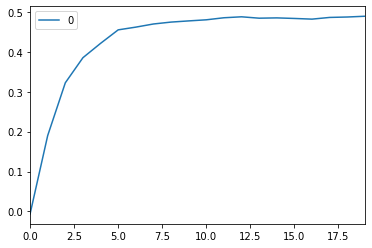

In [117]:
curve = pd.DataFrame(r_score) #elbow curve 
curve.plot()
ax.figure.savefig('./templates/Images/curve.png')

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [119]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 42)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9897327659059136
Testing Score: 0.9928085181043863
